<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Mall_Customers_CLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Clustering

<hr>

## 1. Importing necessary libraries


In [59]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
print("Necessary packages included successfully!")

Necessary packages included successfully!


## 2. Importing the dataset

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Mall_Customers.csv',error_bad_lines=False)
df.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## 3. Exploring the data

In [61]:
r,c = df.shape
print("The number of rows in the dataset    = ",r)
print("The number of columns in the dataset = ",c)

The number of rows in the dataset    =  200
The number of columns in the dataset =  5


In [62]:
print("Are there any missing values in the dataset ?",df.isnull().values.any())

Are there any missing values in the dataset ? False


## 4.Visualizing results

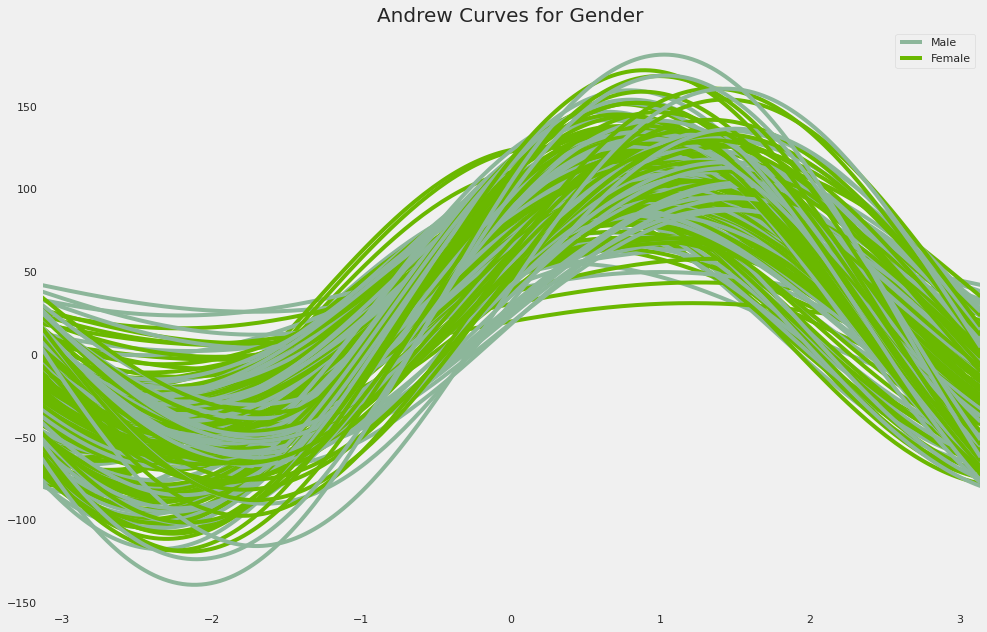

In [63]:
plt.rcParams['figure.figsize'] = (15, 10)


plotting.andrews_curves(df.drop("CustomerID", axis=1), "Genre")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

### It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances. Which means that Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together

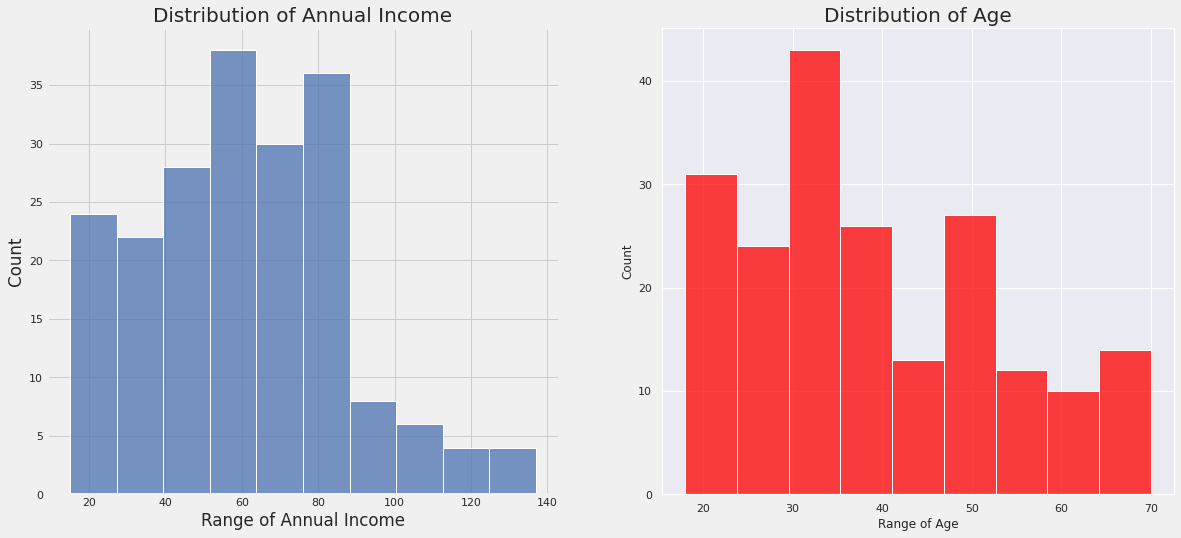

In [64]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'darkgrid')
sns.histplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

### People of income range 60 to 80 are found the most.
### People of age 30-35 years are found to spend the most.

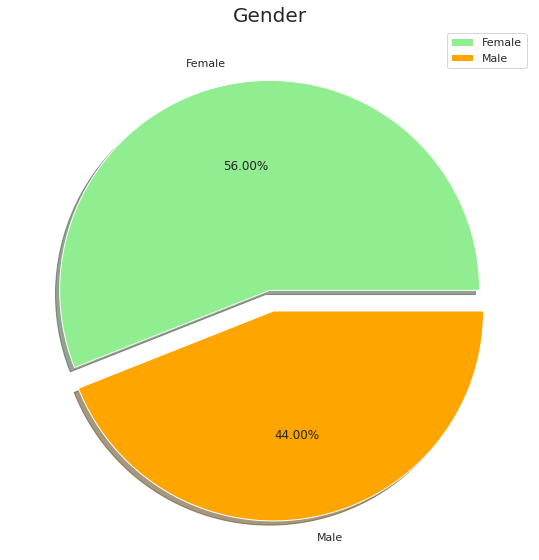

In [65]:
labels = ['Female', 'Male']
size = df['Genre'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

### Female buyers are the majority of the shop's revenue

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



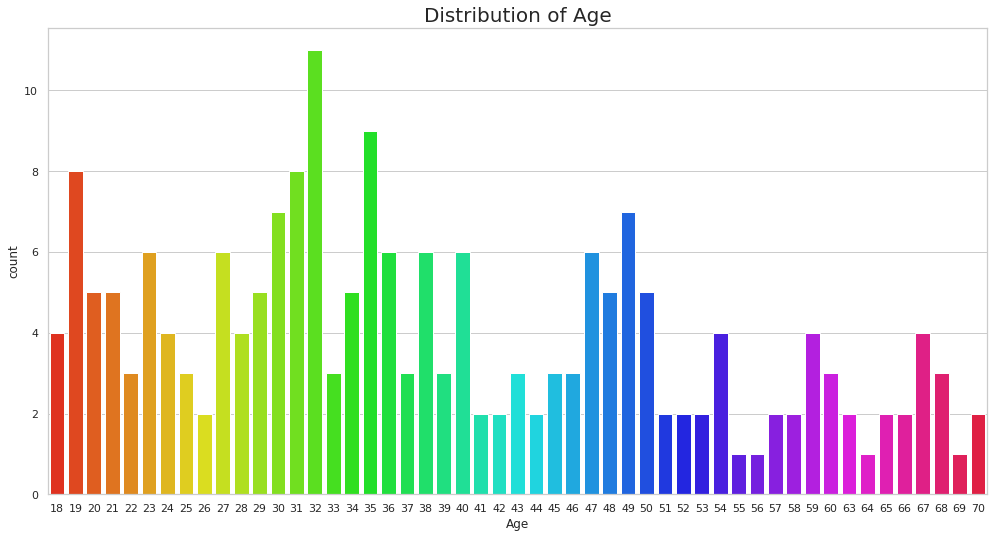

In [66]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

### This clearly demonstates that people of age 31 has the highest expenditure compared to others.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



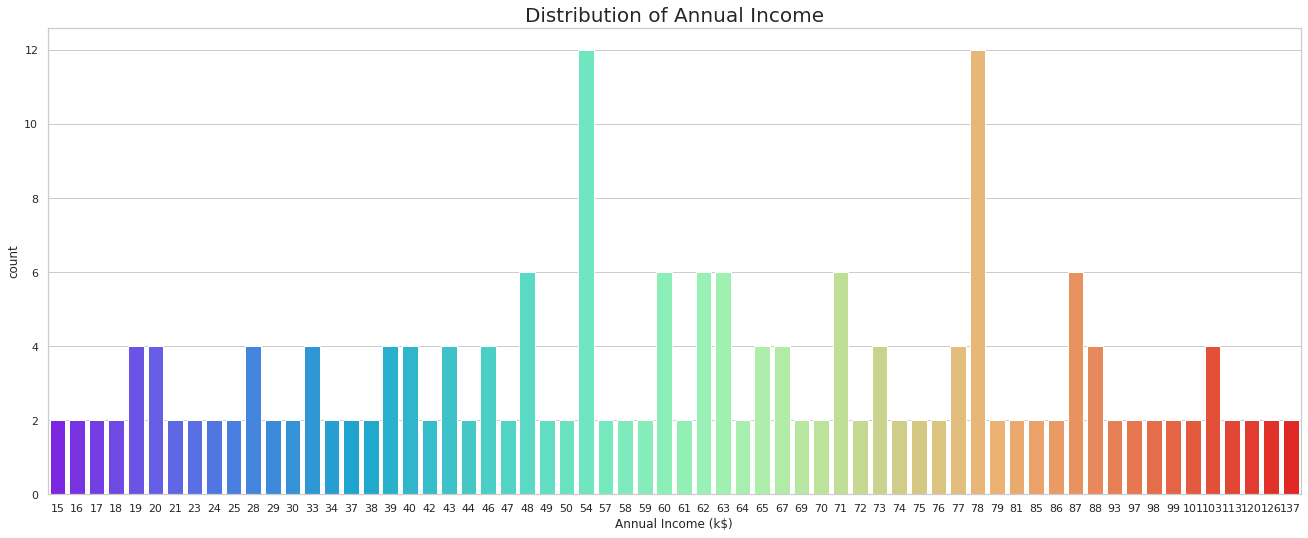

In [67]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



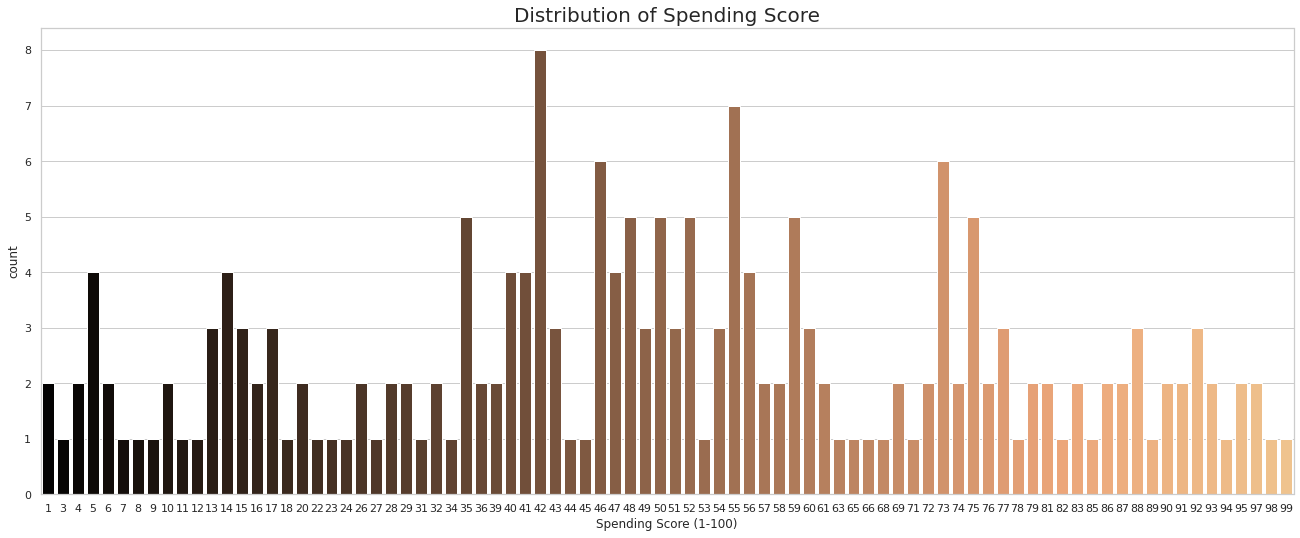

In [68]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

## 5. Complete parametric analysis plot.

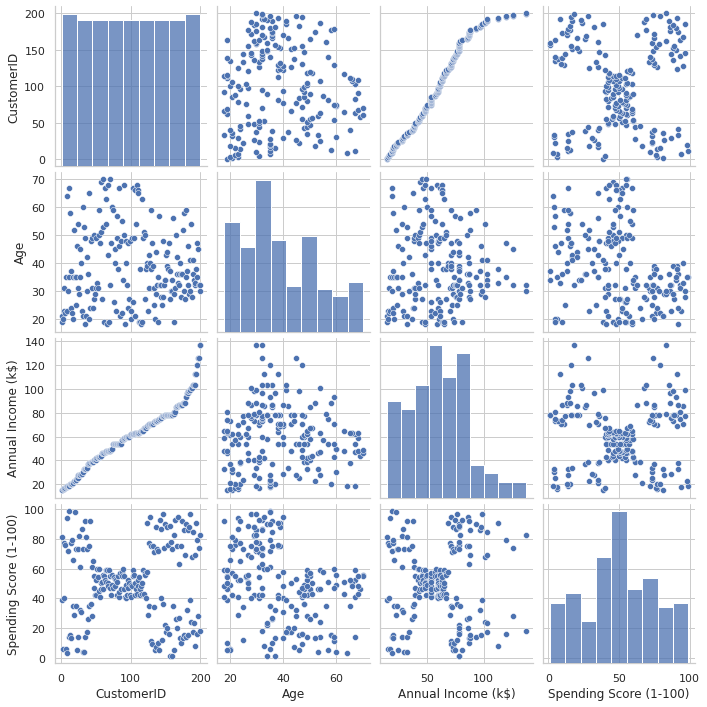

In [69]:
sns.pairplot(df)
plt.show()

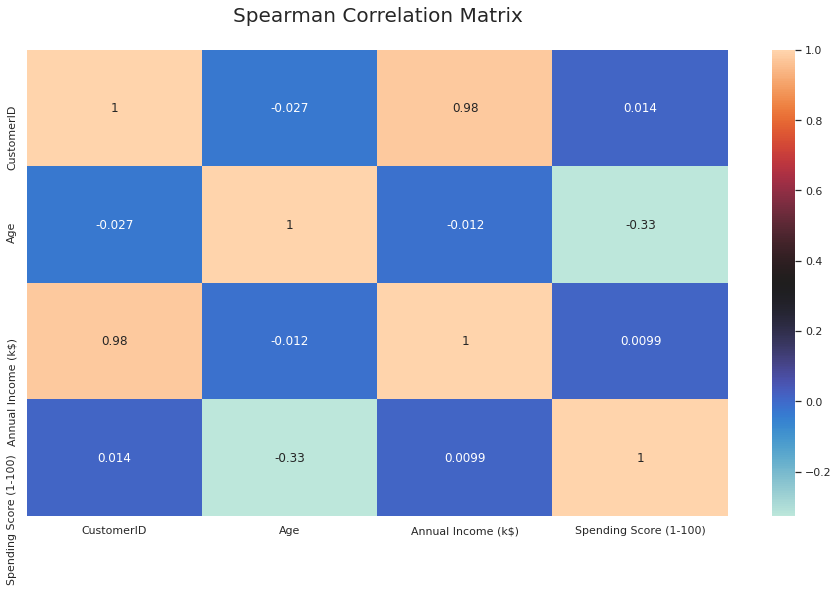

In [70]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(df.corr(), cmap = 'icefire', annot = True)
plt.title("Spearman Correlation Matrix\n", fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



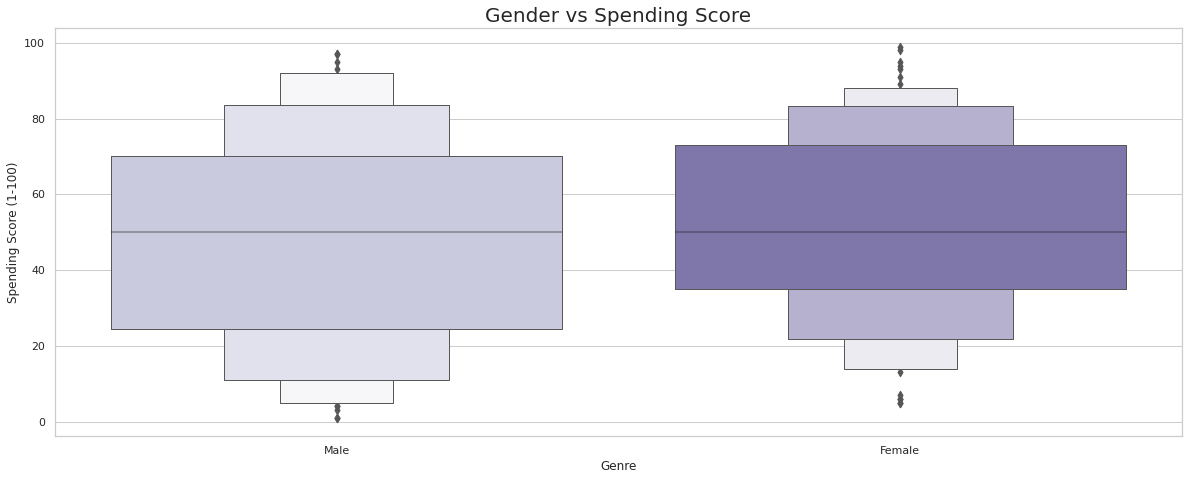

In [71]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['Genre'], df['Spending Score (1-100)'], palette = 'Purples')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



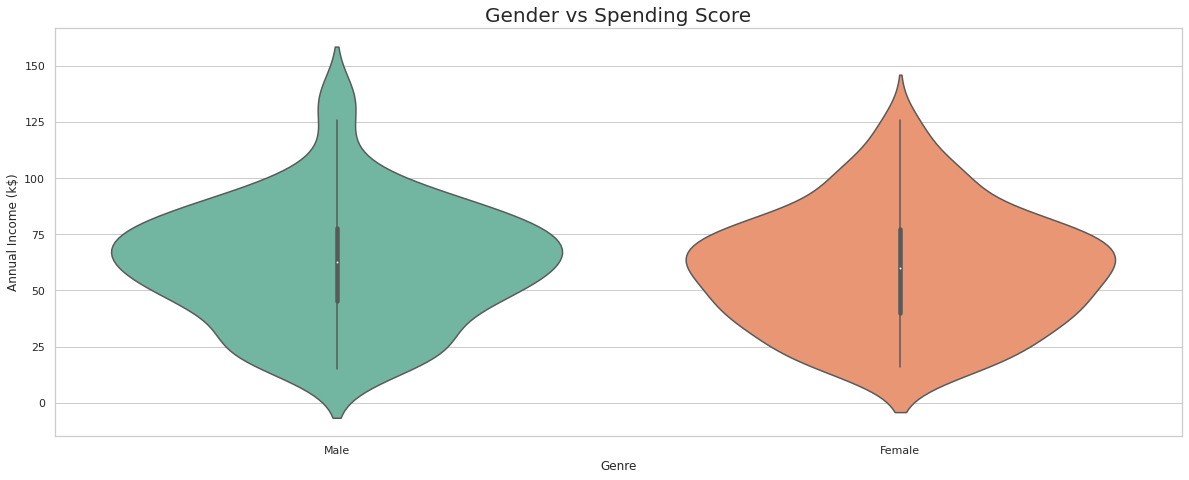

In [72]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['Genre'], df['Annual Income (k$)'], palette = 'Set2')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



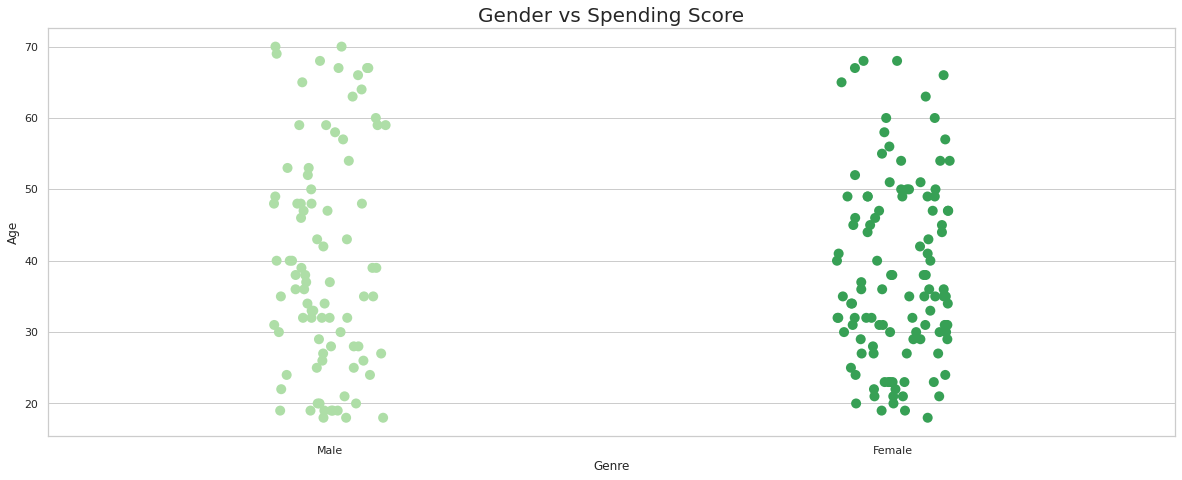

In [73]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df['Genre'], df['Age'], palette = 'Greens', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



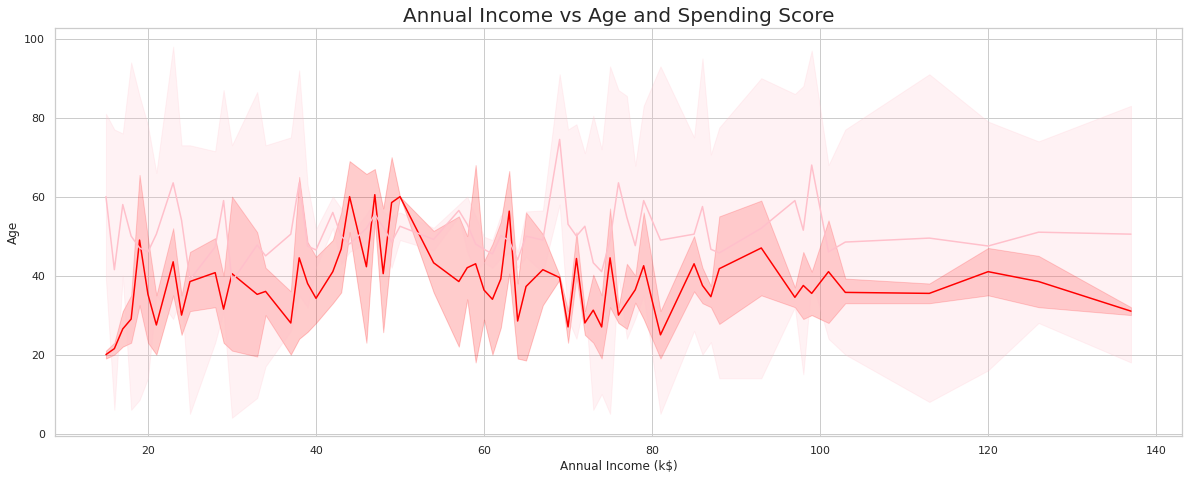

In [74]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'red')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [75]:
x = df.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


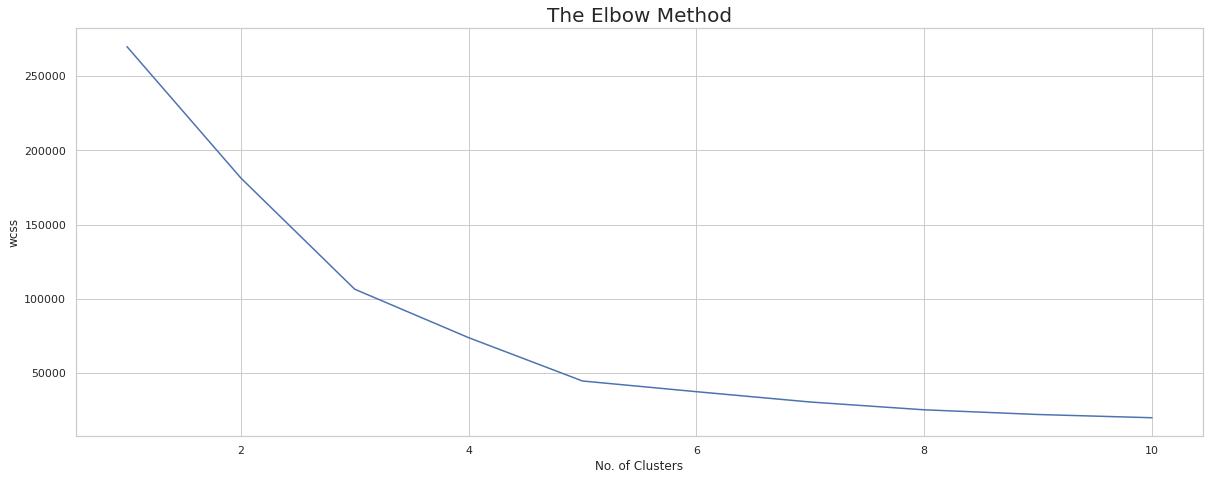

In [76]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

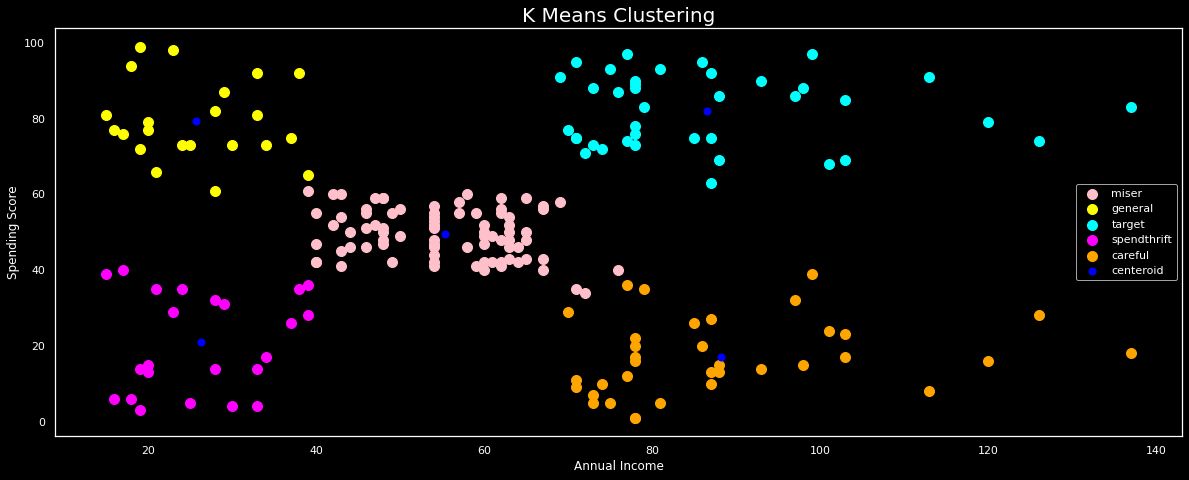

In [77]:
plt.style.use('dark_background')
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('dark_background')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

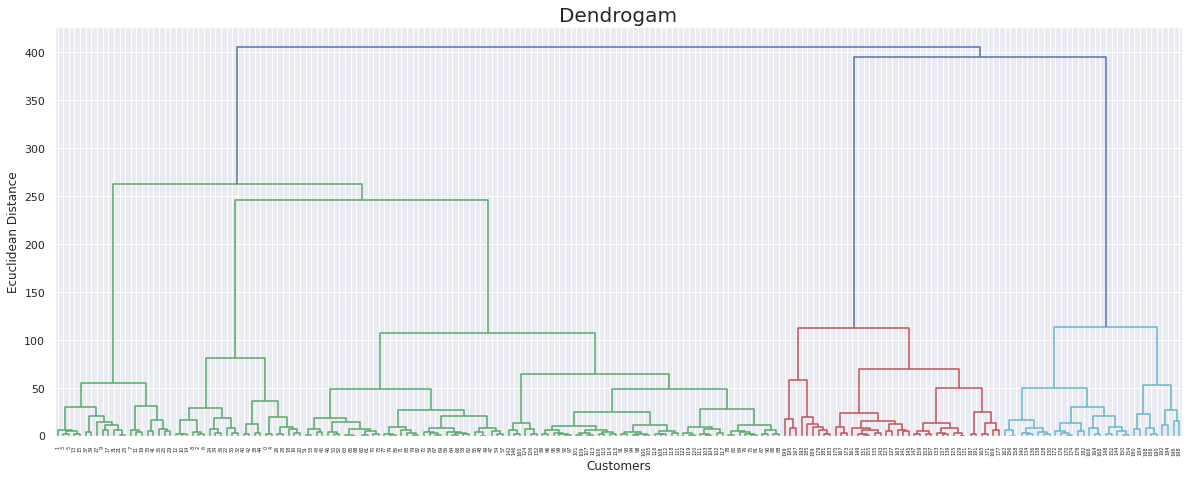

In [78]:
import scipy.cluster.hierarchy as sch
sns.set_style('darkgrid')
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

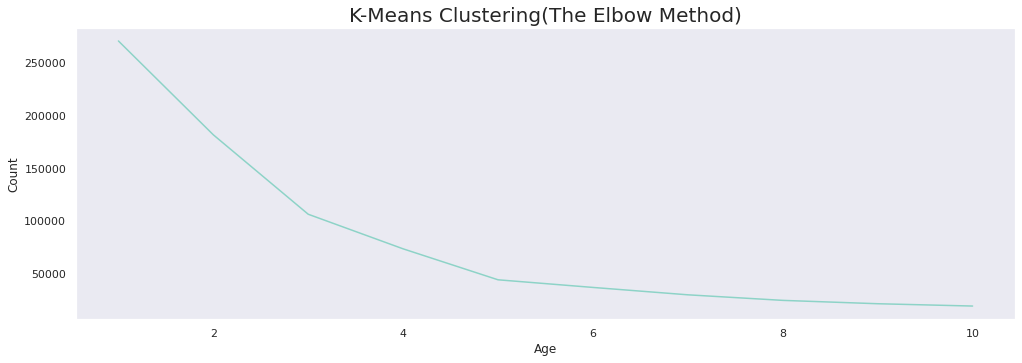

In [79]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

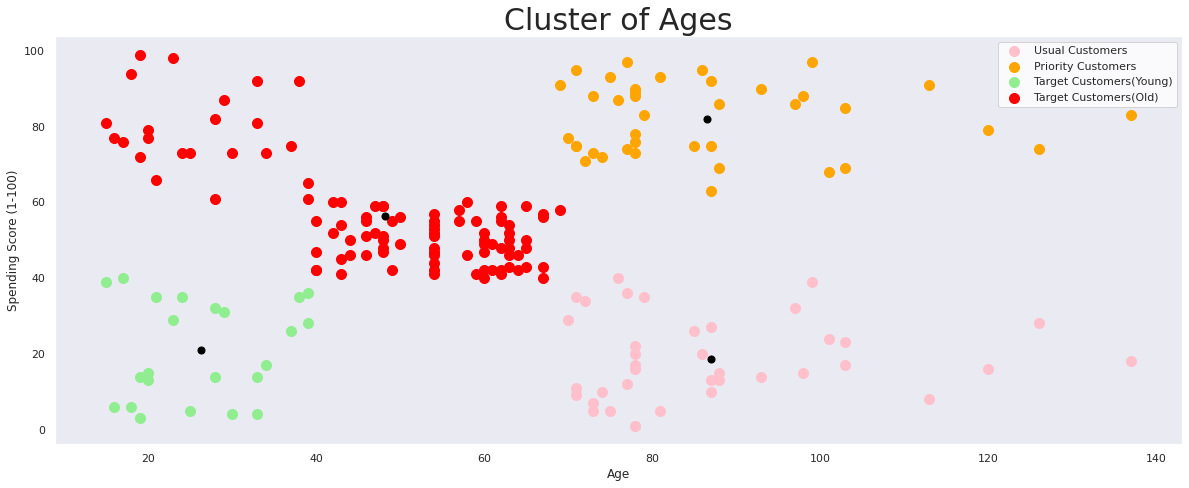

In [80]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (18, 7)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

sns.set_style('whitegrid')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

## 6. Conclusion

### i.   Most amounts are spent by women of age 31 to 35.
### ii.  Most people have an average earning score of 60 to 80.
### iii. Maximum targeted customers are below the age of 60.
### iv.  Prority customers are elder than 60 years in age.
### v.   Annual income of females are more well distributed.